# 랜덤포레스트
#### <img src='../img/randomforest.png' width='85%'>
앙상블 학습 알고리즘 중 대표적인 학습 알고리즘
- 여러 개의 의사결정나무들을 생성한 다음, 각 개별 트리의 예측값들 중에서 가장 많이 선택된 클래스로 예측하는 알고리즘
- 배깅분류기에 의사결정트리를 넣는 대신 결정트리에 최적화되어 있는 포레스트분류기를 사용

## 랜덤포레스트 분석 실행

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier

In [3]:
from sklearn.ensemble import BaggingClassifier

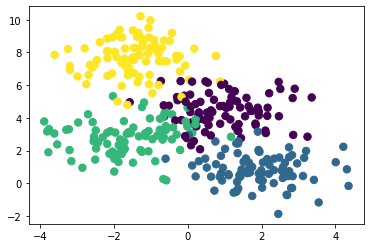

In [4]:
# 테스트용 데이터 생성
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=350, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=55)
plt.show()

# 데이터 분할
x_train, x_test, y_train, y_test = \
    train_test_split(X, y,
                     random_state=2209021005)

In [5]:
# n_estimators : 모형 갯수 지정
# n_jobs : 다중작업수 지정
# oob_score : 베깅 평가지수 사용여부
# criterion : 정보혼잡도 알고리즘 지정

rfclf = RandomForestClassifier(n_estimators=500, n_jobs=-1, 
                          oob_score=True, criterion='entropy')

rfclf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, n_jobs=-1,
                       oob_score=True)

In [6]:
rfclf.oob_score_

0.9274809160305344

In [7]:
pred = rfclf.predict(x_test)
accuracy_score(y_test, pred)

0.8636363636363636

/opt/miniconda3/lib/python3.8/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


<AxesSubplot:>

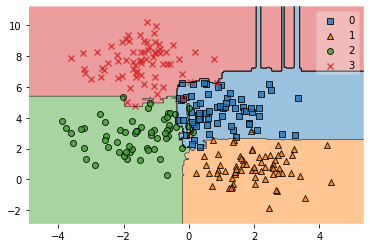

In [8]:
# 결정영역 시각화
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x_train, y_train, rfclf)

# 랜덤포레스트 분류기의 장점은
- 특성의 중요도를 측정할 수 있음
- 어떤 특성이 불순도를 낮추는지 확인하여 중요도를 측정
- feature_importances_를 이용해서 중요도 출력가능

In [9]:
rfclf.feature_importances_

[0.45307912 0.54692088]


# 연습문제 - iris

In [22]:
# 데이터 적재
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data               # sepal, petal
# data = iris.data[:, [0,1]]     # sepal
# data = iris.data[:, [2,3]]   # petal
target = iris.target

scaler = StandardScaler()    # 표준화
scaler.fit_transform(data)

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [24]:
rfclf = RandomForestClassifier(n_estimators=100, 
        n_jobs=-1, oob_score=True, criterion='entropy')

rfclf = rfclf.fit(data, target)
rfclf.oob_score_

0.9533333333333334

In [25]:
# 특성 중요도 확인
rfclf.feature_importances_

array([0.07753307, 0.01776709, 0.44641758, 0.45828226])

# 특성 중요도 시각화

In [28]:
importance = rfclf.feature_importances_

# 값이 큰순으로 정렬
indices = np.argsort(importance)[::-1]  
names = [iris.feature_names[i] for i in indices]
np.argsort(importance), indices, names

(array([1, 0, 2, 3]),
 array([3, 2, 0, 1]),
 ['petal width (cm)',
  'petal length (cm)',
  'sepal length (cm)',
  'sepal width (cm)'])

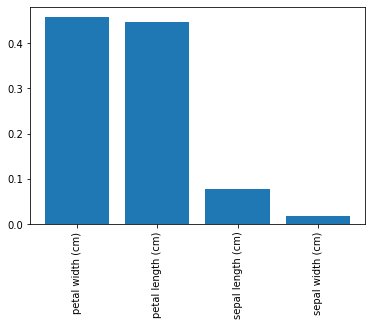

In [29]:
# 막대그래프 출력
plt.bar(range(4), importance[indices])
plt.xticks(range(4), names, rotation=90)
plt.show()